<a href="https://colab.research.google.com/github/Rohanjos97/Adversarial_ML_Assignments/blob/lab3/Adversarial_ML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

## In this assignment you will implement how to perform adversarial attacks using Keras and TensorFlow.

## Q1. The Fast Gradient Sign Method (FGSM),
### a. The one parameter you need to tune which is η
## Q2. IFGSM (PGD),
### a. The one parameter you need to tune which is η
## Q3. CW attack.
### a. The two parameters you need to tune are:
####i. α : Gradient descent step size
####ii. λ : Regularization parameter

## These attacks exploits the gradients of a neural network to build an adversarial image.

## The result is an output image that, according to the human eye, looks identical to the original, but makes the neural network make an incorrect prediction.

## Take 10 sample images for classification using ResNet-50 and show the original class before attack and new class after attack with different hyper parameters value for all 3 attacks given above.

# Comment your observation.

In [6]:
 
import tensorflow as tf
import keras
import numpy as np
import os

import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [2]:
resnet = ResNet50(weights='imagenet')

# for layer in restnet.layers:
#     layer.trainable = False

102967424/102967424 [==============================] - 2s 0us/step


In [3]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## The sample images choosen for classification

1/1 [==============================] - 0s 208ms/step


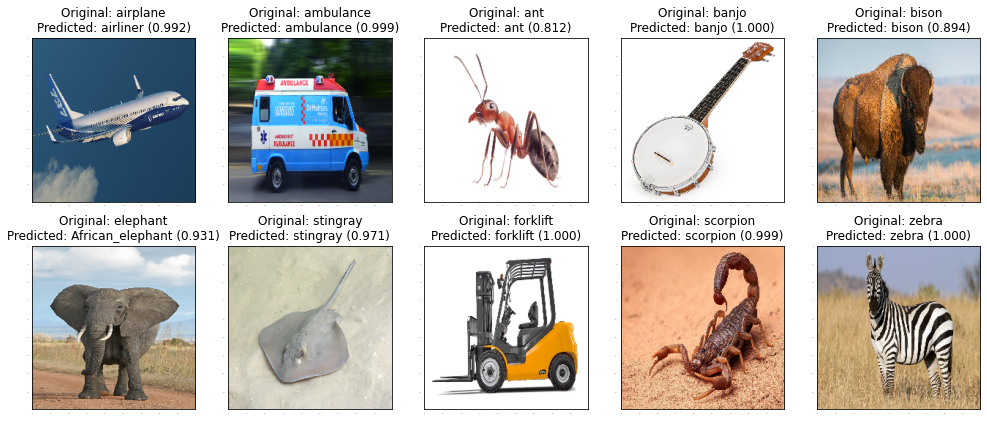

In [46]:
# Loading the image and pre-processing it for ResNet50 model
image_name = ['airplane', 'ambulance', 'ant', 'banjo', 'bison', 'elephant', 'stingray', 'forklift', 'scorpion', 'zebra']

fig, axes = plt.subplots(2, 5, figsize=(17, 7))

for ind, img_name in enumerate(image_name):
  img_path = os.path.join('/content/sample_images/', img_name + '.jpg')
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x.astype(np.uint8)

  # Predictions on images
  pred = resnet.predict(x)
  pred = decode_predictions(pred, top=1)[0]

  axes[int(ind/5), int(ind%5)].imshow(x[0])
  axes[int(ind/5), int(ind%5)].set_title(f'Original: {img_name}\nPredicted: {pred[0][1]} ({pred[0][2]:0.3f})')
  axes[int(ind/5), int(ind%5)].tick_params(which='both', size=0, labelsize=0)